# Análise Exploratória de Dados sobre <span style="color:green">Board Games</span>
## Por: Vinícius Leôncio 
### Módulo: Banco de Dados
---

O objetivo deste projeto é proporcionar a oportunidade de aplicar os conhecimentos adquiridos ao longo da disciplina de Banco de Dados em um contexto prático, relevante e data-driven. Com uma análise exploratória de dados sobre Board Games que foram adquiridos do site BoardGameGeek, maior plataforma online voltada para o hobby de jogos de tabuleiro, utilizando um conjunto de dados real, a fim de extrair insights e entender melhor a base de dados.

Base de dados usada: https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek

Foi explorado o seguinte dataset nesse arquivo: 
- subcategories.csv
- games.csv

Obs: Foram excluidas algumas colunas dos datasets que se referenciavam a datasets não trabalhados nesse projeto ou que tinha pouca relevancia para a análise.

---

## Primeiros Passos 
- Criação das tabelas 'subcategories' e 'games' no banco de dados PostegreSQL usando o pgAdmin 4
- Exportação dos dados dos datasets(.csv) para as tabelas no banco de dados com a opção 'Export/Import' em cada tabela  
<br>
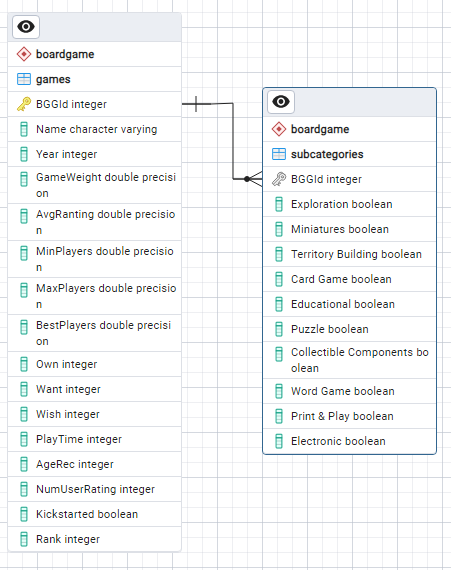
---

## Conexão com o Banco de Dados
Criação de uma conexão com o banco de dados PostgreSQL usando o método create_engine do SQLAlchemy. Isso requer uma string de conexão que especifica o tipo de banco de dados, o local do servidor, o nome do banco de dados e outras informações necessárias para estabelecer a conexão. Com a conexão estabelecida, é possivel executar consultas SQL usando o SQLAlchemy.

In [79]:
import pandas as pd 
from sqlalchemy import create_engine

SGBD = "postgresql+psycopg2"
USER = "postgres"
SENHA = ""
HOST = "localhost"
DATABASE = "postgres"

engine = create_engine(f"{SGBD}://{USER}:{SENHA}@{HOST}:5432/{DATABASE}")
conn = engine.connect()

---
## Conhecendo a Base de Dados
A seguir sera feita uma análise descritiva para entender melhor a estrutura da base de dados escolhida.

### Visão Geral

In [80]:
query = """
SELECT *
FROM boardgame.games;
"""
df_games = pd.read_sql_query(query, con = engine)
df_games


,bgg_id,name,year,game_weight,avg_ranting,min_players,max_players,best_players,own,want,wish,play_time,age_rec,num_user_rating,kickstarted,rank
0,1,Die Macher,1986,4.3206,7.61428,3.0,5.0,5.0,7498,501,2039,240,14,5354,False,316
1,2,Dragonmaster,1981,1.9630,6.64537,3.0,4.0,0.0,1285,72,191,30,12,562,False,3993
2,3,Samurai,1998,2.4859,7.45601,2.0,4.0,3.0,15578,799,3450,60,10,15146,False,224
3,4,Tal der Könige,1992,2.6667,6.60006,2.0,4.0,0.0,638,54,123,60,12,340,False,5345
4,5,Acquire,1964,2.5031,7.33861,2.0,6.0,4.0,23735,548,2671,90,12,18655,False,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21920,347146,Salvage,2021,0.0000,7.45000,3.0,4.0,0.0,46,10,34,40,10,34,False,13730
21921,347521,Blitzkrieg!: World War Two in 20 Minutes,2019,1.6667,7.92276,1.0,2.0,0.0,152,16,52,45,14,45,False,21926
21922,348955,Rock Paper Scissors: Deluxe Edition,2021,4.5625,6.96970,1.0,3.0,0.0,6,2,13,1,12,66,True,11507
21923,349131,Splitter,2021,1.0000,6.48235,1.0,12.0,0.0,110,10,49,15,8,51,False,13460


In [81]:
query = """
SELECT *
FROM boardgame.subcategories;
"""
df_subcat = pd.read_sql_query(query, con = engine)
df_subcat

,bgg_id,exploration,miniatures,territory_building,card_game,educational,puzzle,collectible_components,word_game,print&play,electronic
0,1,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,True,False,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,False
3,4,False,False,False,False,False,False,False,False,False,False
4,5,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21920,347146,False,False,False,True,False,False,False,False,False,False
21921,347521,False,False,False,False,False,False,False,False,False,False
21922,348955,False,False,False,False,False,False,False,False,True,False
21923,349131,False,False,False,False,False,False,False,False,False,False


### Algumas Medidas Estatísticas

In [82]:
df_games.describe().round(2)

,bgg_id,year,game_weight,avg_ranting,min_players,max_players,best_players,own,want,wish,play_time,age_rec,num_user_rating,rank
count,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00,21925.00
mean,117652.66,1985.49,1.98,6.42,2.01,5.71,0.31,1467.85,41.69,228.46,90.51,9.61,861.67,11019.51
std,104628.72,212.49,0.85,0.93,0.69,15.01,1.07,5294.12,117.26,788.48,529.66,3.64,3638.68,6372.93
min,1.00,-3500.00,0.00,1.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,1.00
25%,12346.00,2001.00,1.33,5.84,2.00,4.00,0.00,150.00,3.00,14.00,25.00,8.00,56.00,5488.00
50%,105305.00,2011.00,1.97,6.45,2.00,4.00,0.00,320.00,9.00,39.00,45.00,10.00,123.00,11022.00
75%,206169.00,2017.00,2.53,7.05,2.00,6.00,0.00,899.00,28.00,127.00,90.00,12.00,395.00,16544.00
max,349161.00,2021.00,5.00,9.91,10.00,999.00,15.00,166497.00,2031.00,19182.00,60000.00,25.00,108101.00,21926.00


In [83]:
df_subcat.describe().round(2)

,bgg_id
count,21925.00
mean,117652.66
std,104628.72
min,1.00
25%,12346.00
50%,105305.00
75%,206169.00
max,349161.00


### Quantidade de registros

In [84]:
df_games.shape[0]

21925

In [85]:
df_subcat.shape[0]

21925

### Nomes e Tipos de Dados das Colunas

In [86]:
df_games.dtypes

bgg_id               int64
name                object
year                 int64
game_weight        float64
avg_ranting        float64
min_players        float64
max_players        float64
best_players       float64
own                  int64
want                 int64
wish                 int64
play_time            int64
age_rec              int64
num_user_rating      int64
kickstarted           bool
rank                 int64
dtype: object

In [87]:
df_subcat.dtypes

bgg_id                    int64
exploration                bool
miniatures                 bool
territory_building         bool
card_game                  bool
educational                bool
puzzle                     bool
collectible_components     bool
word_game                  bool
print&play                 bool
electronic                 bool
dtype: object

### Dados Faltantes

In [88]:
df_games.isnull().sum()

bgg_id             0
name               0
year               0
game_weight        0
avg_ranting        0
min_players        0
max_players        0
best_players       0
own                0
want               0
wish               0
play_time          0
age_rec            0
num_user_rating    0
kickstarted        0
rank               0
dtype: int64

In [89]:
df_subcat.isnull().sum()

bgg_id                    0
exploration               0
miniatures                0
territory_building        0
card_game                 0
educational               0
puzzle                    0
collectible_components    0
word_game                 0
print&play                0
electronic                0
dtype: int64

---
## Questionamentos a Respeito dos Dados

### 1. Quais os jogos mais antigos?

In [19]:
query = """
SELECT name, year
FROM boardgame.games
ORDER BY year ASC 
LIMIT 10;
"""
df = pd.read_sql_query(query, con = engine)
df

,name,year
0,Senet,-3500
1,Marbles,-3000
2,Knucklebones,-3000
3,Backgammon,-3000
4,The Royal Game of Ur,-2600
5,Go,-2200
6,Nine Men's Morris,-1400
7,Three Men's Morris,-1400
8,Tic-Tac-Toe,-1300
9,Chutes and Ladders,-200


### 2. Quais os jogos considerados mais difíceis (pesados), com mais de 100 avaliações?

In [44]:
query = """
SELECT name, game_weight, num_user_rating
FROM boardgame.games
JOIN boardgame.subcategories ON games.bgg_id = subcategories.bgg_id
WHERE num_user_rating > 100
ORDER BY game_weight DESC
LIMIT 10;
"""
df = pd.read_sql_query(query, con = engine)
df

,name,game_weight,num_user_rating
0,Europa Universalis,4.8537,343
1,A World at War,4.8447,339
2,High Frontier 4 All,4.8235,748
3,La Grande Guerre 14-18,4.7500,104
4,Advanced Squad Leader,4.7321,3577
5,1817,4.7162,557
6,The Campaign for North Africa: The Desert War ...,4.7094,154
7,High Frontier (Third Edition),4.7080,663
8,Air War: Modern Tactical Air Combat,4.6613,311
9,On Mars,4.6477,7690


### 3. Quais anos tiveram os maiores números de lançamentos?

In [6]:
query = """
SELECT year, COUNT(*) as quantity
FROM boardgame.games
GROUP BY year
ORDER BY quantity DESC
LIMIT 10;
"""
df = pd.read_sql_query(query, con = engine)
df

,year,quantity
0,2017,1356
1,2018,1351
2,2016,1321
3,2019,1302
4,2015,1185
5,2014,1032
6,2020,927
7,2013,875
8,2012,843
9,2011,746


### 4. Qual a idade média recomendada dos jogos no rank top 100?

In [14]:
query = """
SELECT AVG(age_rec) as age_rec
FROM boardgame.games
WHERE rank <= 100
"""
df = pd.read_sql_query(query, con = engine)
df

,age_rec
0,12.64


### 5. Qual a porcentagem de jogos que foram 'kickstarted' (financiamento coletivo)? 

In [42]:
query = """
SELECT COUNT(kickstarted) as kickstarted,
       (SELECT COUNT(bgg_id) FROM boardgame.games) as games,
       CAST(COUNT(kickstarted) AS FLOAT)/(SELECT COUNT(bgg_id) FROM boardgame.games)*100 as percentage
FROM boardgame.games
WHERE kickstarted = true;
"""
df = pd.read_sql_query(query, con = engine)
df.round(2)

,kickstarted,games,percentage
0,3362,21925,15.33


### 6. Quais os jogos mais avaliados?

In [44]:
query = """
SELECT name, num_user_rating
FROM boardgame.games
ORDER BY num_user_rating DESC
LIMIT 10
"""
df = pd.read_sql_query(query, con = engine)
df

,name,num_user_rating
0,Pandemic,108101
1,Carcassonne,107937
2,Catan,107141
3,7 Wonders,89249
4,Dominion,81131
5,Ticket to Ride,75531
6,Codenames,73522
7,Terraforming Mars,73093
8,7 Wonders Duel,68294
9,Agricola,65810


### 7. Quais jogos as pessoa mais tem?

In [45]:
query = """
SELECT name, own
FROM boardgame.games
ORDER BY own DESC
LIMIT 10
"""
df = pd.read_sql_query(query, con = engine)
df

,name,own
0,Pandemic,166497
1,Catan,165651
2,Carcassonne,159709
3,7 Wonders,119235
4,Codenames,117959
5,7 Wonders Duel,108774
6,Dominion,106256
7,Ticket to Ride,104472
8,Terraforming Mars,99827
9,Love Letter,97734


### 8. Qual a faixa etaria média para jogos na subcategoria de Educação?

In [47]:
query = """
SELECT AVG(age_rec)
FROM boardgame.games
JOIN boardgame.subcategories ON games.bgg_id = subcategories.bgg_id
WHERE educational = true;
"""
df = pd.read_sql_query(query, con = engine)
df.round(1)

,avg
0,8.6


### 9. Qual a quantidade de jogos em cada subcategoria?

In [75]:
query = """
SELECT 
    (SELECT count(exploration) FROM boardgame.subcategories WHERE exploration = true) as exploration,
    (SELECT count(miniatures) FROM boardgame.subcategories WHERE miniatures = true) as miniatures,
    (SELECT count(territory_building) FROM boardgame.subcategories WHERE territory_building = true) as territory_building,
    (SELECT count(card_game) FROM boardgame.subcategories WHERE card_game = true) as card_game,
    (SELECT count(educational) FROM boardgame.subcategories WHERE educational = true) as educational,
    (SELECT count(puzzle) FROM boardgame.subcategories WHERE puzzle = true) as puzzle,
    (SELECT count(collectible_components) FROM boardgame.subcategories WHERE collectible_components = true) as collectible_components,
    (SELECT count(word_game) FROM boardgame.subcategories WHERE word_game = true) as word_game,
    (SELECT count("print&play") FROM boardgame.subcategories WHERE "print&play" = true) as "print&play",
    (SELECT count(electronic) FROM boardgame.subcategories WHERE electronic = true) as electronic
FROM boardgame.subcategories
LIMIT 1;
"""
df = pd.read_sql_query(query, con = engine)
df.round(1)

,exploration,miniatures,territory_building,card_game,educational,puzzle,collectible_components,word_game,print&play,electronic
0,897,1089,514,6480,502,676,359,484,604,205


### 10. Quais os jogos mais bem avaliados lançados durante a pandemia(2020-2021)?

In [77]:
query = """
SELECT name, rank
FROM boardgame.games
WHERE year > 2019
ORDER BY rank ASC
LIMIT 10
"""
df = pd.read_sql_query(query, con = engine)
df

,name,rank
0,Gloomhaven: Jaws of the Lion,6
1,Dune: Imperium,23
2,Lost Ruins of Arnak,41
3,Eclipse: Second Dawn for the Galaxy,46
4,On Mars,56
5,Pandemic Legacy: Season 0,93
6,Kanban EV,139
7,Viscounts of the West Kingdom,172
8,Calico,178
9,Praga Caput Regni,184
